In [18]:
from PIL import Image
import numpy as np

#im.show()

In [19]:
def load_image_red(name):
    im = Image.open(name)
    red, green, blue = im.split()
    im = red
    return im

def image_to_numpy(image):
    np_im = np.array(image)
    return np.uint8(np_im)

def np_hist(image):
    hist = np.zeros(256)
    for (x,y), value in np.ndenumerate(np_im):
        hist[value]+=1
    return hist

def np_invert(image):
    def i(x):
        value = 255-x
        return np.clip(value,0,255)
    i = np.vectorize(i)
    return np.uint8(i(image))

    #Hohe Dosen sind hohe werte
def scale_inverted_image(image,saturation_percentage = 99.7,underground_percentage = 10):
    saturation = np.percentile(image, saturation_percentage)
    underground = np.percentile(image, underground_percentage)
    
    def scale_elements(x):
        x =  (x-underground)*(255/(saturation-underground))
        return np.clip(x,0,255)
        
    scale_elements = np.vectorize(scale_elements)
    return np.uint8(scale_elements(image))

def exponential_scale_image(image):
        import math
        def scale_elements(x):
            x = math.exp(x/46.01)
            return np.clip(x,0,255)
        scale_elements = np.vectorize(scale_elements)
        return np.uint8(scale_elements(image))
    


    


In [20]:
def t_scale_elements(x):
        import math
        x = math.exp(x/46.01)
        return np.clip(x,0,255)
        
t_scale_elements(251)

234.00343542795153

In [21]:

def exp_image(path):
    image = load_image_red(path)

    np_im = image_to_numpy(image)

    np_inv = np_invert(np_im)

    np_scaled = scale_inverted_image(np_inv,underground_percentage=50,saturation_percentage=99.7)

    np_exponential = exponential_scale_image(np_scaled)
    
    return Image.fromarray(np_exponential, 'L')

def showpreview(img,basewidth=900):
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    img.show()


In [22]:
A10 = exp_image("/home/martin/Documents/Radiochromer_Film/ImageJ/Radiochrom_lowres/10_l.jpg")
A33 = exp_image("/home/martin/Documents/Radiochromer_Film/ImageJ/Radiochrom_lowres/33.jpg")
A60 = exp_image("/home/martin/Documents/Radiochromer_Film/ImageJ/Radiochrom_lowres/60.jpg")


showpreview(A10)
showpreview(A33)
showpreview(A60)
    
#img = Image.fromarray(np_exponential, 'L')
#showpreview(img)
#img = Image.fromarray(np_scaled, 'L')
#showpreview(img)
#img = Image.fromarray(np_exponential-np_scaled, 'L')
#showpreview(img)

In [23]:
testimage = exp_image("/home/martin/Downloads/Radiochrom_Testimage_2_cropped.jpg")
showpreview(testimage,1500)

In [24]:
testimage = np.concatenate([np.zeros((300,150)),np.full((300,150),155)],axis = 1)

t = Image.fromarray(np.uint8(testimage), 'L')
showpreview(t)
np.full((10,5),155)-np.full((10,5),150)

array([[5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5]])

In [35]:
print(np_im.shape)

    
    
untergrund = np.argmax(hist)
saturation = np.percentile(np_im, 0.3)
untergrund_2 = np.percentile(np_im, 90)
untergrund_2

def invert(x):
    

def scale(x):
    return 

f = np.vectorize()  # or use a different name if you want to keep the original f

result_array = f(A)  # if A is your Numpy array

(1983, 1095)


NameError: name 'f' is not defined

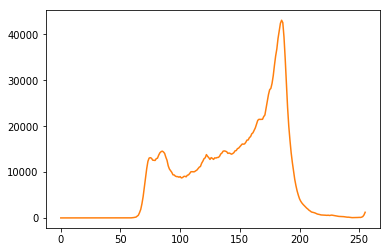

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist)
plt.show()

In [25]:
import ij

ModuleNotFoundError: No module named 'ij'